### 评论分析
对获取的199条评论进行分析


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 读入评论数据 并分行
df = pd.read_csv("评论.csv",encoding='utf-8')
df.columns = ['评论', '时间', '点赞数']
df

,评论,时间,点赞数
0,我喝过你喝过的西北风，那么我们算不算一样穷[思考],2021-02-05 12:50:32,65207
1,此时一个自信的少年打开了全民K歌[doge],2021-01-27 11:40:57,55711
2,听到这句歌词“我吹过你吹过的晚风，那我们算不算相拥”时，突然记起了这句话“两处相思同淋雪，此...,2021-01-29 22:25:06,37575
3,女朋友推荐来的她说“我吹过你吹过的晚风，那我们算不算相拥”这句歌词让她爱上了这首歌虽然现在我...,2021-02-01 04:43:55,28708
4,“我和我的他，差了一个次元。”,2021-02-01 18:46:32,20587
...,...,...,...
194,歌不错。人不行。,2021-08-13 13:03:33,35
195,惭愧，听了几个月五四特别版才知道原来是翻唱。慕名而来听了原曲，实话实说，原词真挺口水的，共青...,2021-08-04 00:57:50,35
196,好吧，断断续续的了解了下。当初我用B站只看番时，就从音乐软件听过他歌了，也算个粉丝（听歌的那...,2021-07-20 00:47:44,35
197,（转）姐妹们姐妹们，现在艾辰可能不会管b站这边了，艾晨昨天又在dy发布了歌，我们现在应该把战...,2021-07-19 14:16:21,35


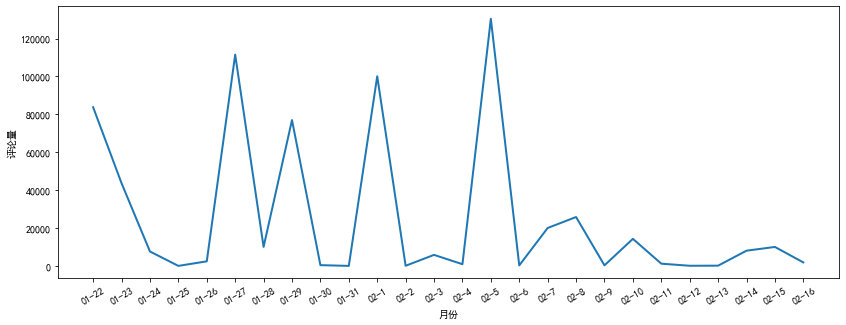

In [8]:
# 为了使分月时，第二列显示出数量重新分列，
df.columns = ['评论', '时间', '点赞数']
# 将数据类型转换为日期类型
df['时间'] = pd.to_datetime(df['时间'])
# 将date设置为index
df_time = df.set_index('时间')
# 根据天进行分离
df_month = df_time.resample('D').sum().to_period('D')
# 截取前26天的评论点赞数，间接反应了当时人气
df_month = df_month[0:26]

#设置中文显示
plt.rcParams['font.sans-serif']='SimHei'
# make data
day_list = []
for d in range(22,32):
    day_list.append(f"01-{d}")
for d in range(1,17):
    day_list.append(f"02-{d}")

# plot
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(day_list,df_month['点赞数'], linewidth=2.0)
plt.xticks(rotation=30)
ax.set_xlabel("月份")
ax.set_ylabel("评论量")
plt.show()

In [4]:
# 导入jieba分词包
import jieba
import wordcloud


#  存放解析出的关键词
keywords = []
# 过滤器，去除其中的词
filter = ['呜呜', '亚瑟', '克兰' ,'不算']
for comment in df['评论']:
    # jieba 切开句子
    word_list = jieba.lcut_for_search(comment)
    # 列表推导式去除单个字符的干扰项
    word_list = [i for i in word_list if (len(i) > 1 and i not in filter)]
    # 过滤后的列表加在一起
    keywords += word_list

font = r'C:\Windows\Fonts\simfang.ttf'
w = wordcloud.WordCloud(
    font_path=font,
    background_color='white',
    width=3840,
    height=2160,
)
# 列表最终加载成字符串
w.generate(" ".join(keywords))
w.to_file('错位时空评论词云图.png')

Building prefix dict from the default dictionary ...
Loading model from cache D:\Temp\User\jieba.cache
Loading model cost 0.633 seconds.
Prefix dict has been built successfully.
